# Fourier Transform

In [2]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 80.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


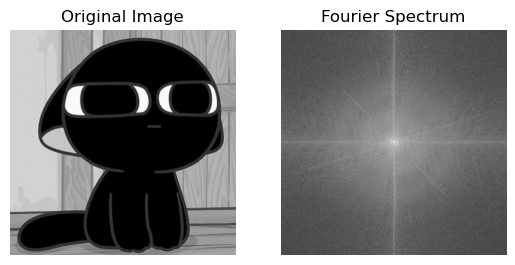

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('hei.jpg', 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 1*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Spectrum'), plt.axis('off')
plt.show()


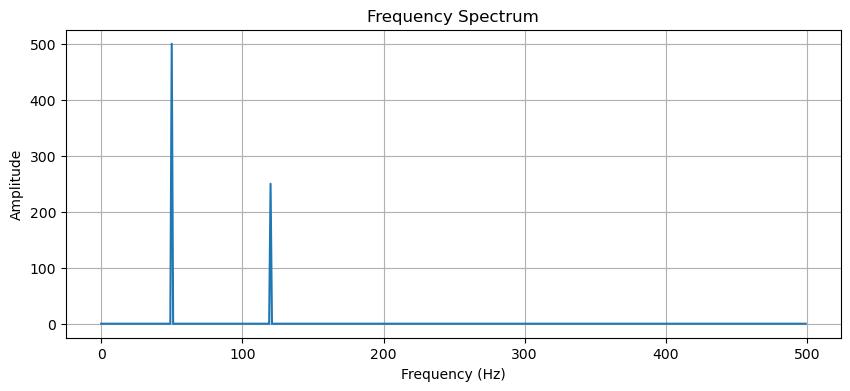

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # frequency
t = np.linspace(0, 1, fs, endpoint=False)  

# construct a signal
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# Fourier transform
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), 1/fs)

half = len(signal)//2

plt.figure(figsize=(10,4))
plt.plot(freqs[:half], np.abs(fft_result)[:half])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


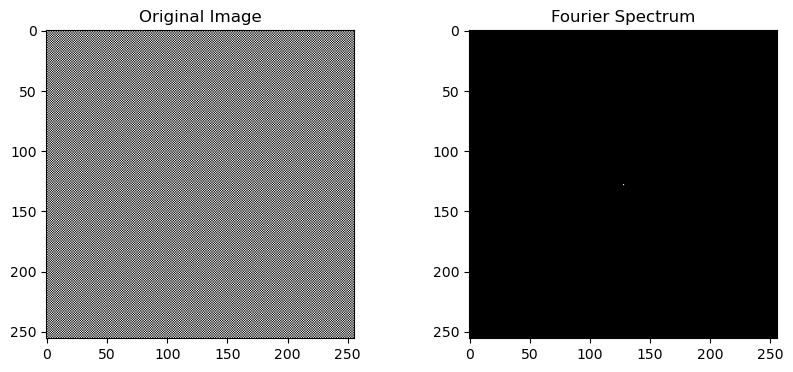

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 256
img = np.zeros((N, N))
img[::2, ::2] = 1
img[1::2, 1::2] = 1

# 2D fourier transformer
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # move 0 fps to the center
magnitude = np.log(1 + np.abs(fshift))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(magnitude, cmap='gray')
plt.title("Fourier Spectrum")
plt.show()


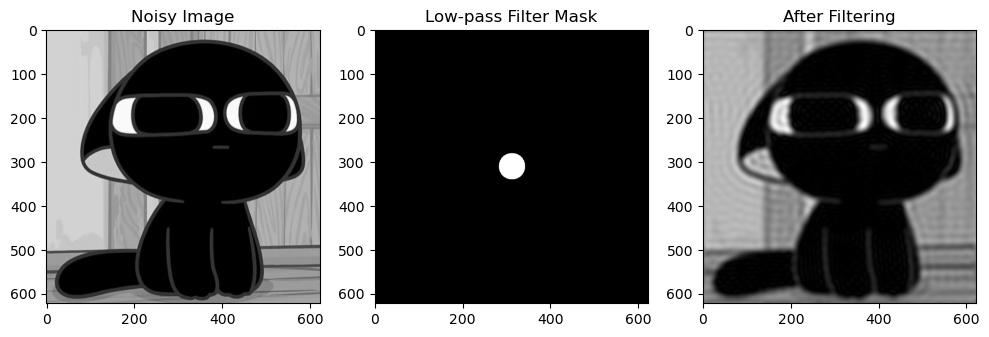

In [13]:
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('hei.jpg', 0)
# fourier tranformer
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols))
r = 30  # radius
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= r*r
mask[mask_area] = 1

# apply mask
fshift_filtered = fshift * mask

# reconstruct
img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_back = np.abs(img_back)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Noisy Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title("Low-pass Filter Mask")

plt.subplot(1,3,3)
plt.imshow(img_back, cmap='gray')
plt.title("After Filtering")

plt.show()


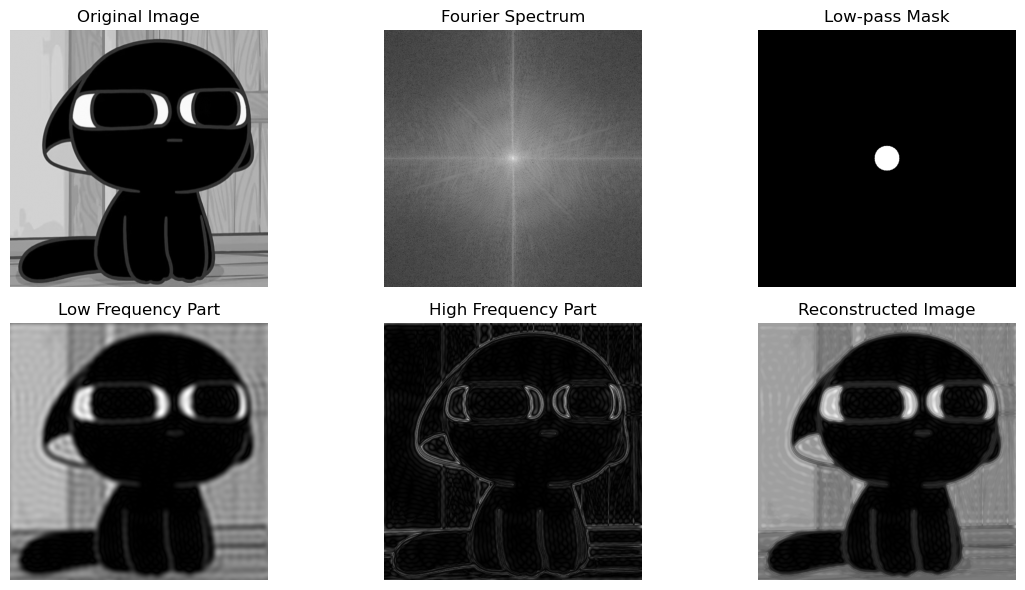

In [12]:
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('hei.jpg', 0)

# Fourier transformer
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

# --- low frequency filter ---
low_mask = np.zeros((rows, cols))
low_radius = 30
y, x = np.ogrid[:rows, :cols]
low_mask_area = (x - ccol)**2 + (y - crow)**2 <= low_radius**2
low_mask[low_mask_area] = 1

# --- high frequency filter ---
high_mask = 1 - low_mask

low_freq = fshift * low_mask
high_freq = fshift * high_mask

# reconstruct
low_img = np.abs(np.fft.ifft2(np.fft.ifftshift(low_freq)))
high_img = np.abs(np.fft.ifft2(np.fft.ifftshift(high_freq)))

plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(np.log(1+np.abs(fshift)), cmap='gray')
plt.title("Fourier Spectrum")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(low_mask, cmap='gray')
plt.title("Low-pass Mask")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(low_img, cmap='gray')
plt.title("Low Frequency Part")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(high_img, cmap='gray')
plt.title("High Frequency Part")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(low_img + high_img, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.tight_layout()
plt.show()
